In [3]:
from enum import unique
import importlib
import xgi
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools
from HONG import *
import HONG
importlib.reload(HONG)
import csv
from tqdm import tqdm
import csv
from numpy import genfromtxt
import matplotlib as mpl

mpl.style.use('report_style.mplstyle')

In [4]:
prop_committed = 0.03
betas = np.linspace(0, 1, 51)
ensemble_size = 10
run_length = 10**6
qs = [1, 0]
social_structures = ['InVS15', 'LyonSchool', 'SFHH', 'Thiers13']

In [5]:
for social_structure in social_structures:
    for q in qs:
        for beta in betas:
            run_ensemble_experiment(prop_committed, beta, beta, ensemble_size, run_length, social_structure, q)

  0%|          | 0/10 [00:28<?, ?it/s]


KeyboardInterrupt: 

# Plotting

loaded data: 0.0
loaded data: 0.02
loaded data: 0.04
loaded data: 0.06
loaded data: 0.08
loaded data: 0.1
loaded data: 0.12
loaded data: 0.14
loaded data: 0.16
loaded data: 0.18
loaded data: 0.2
loaded data: 0.22
loaded data: 0.24
loaded data: 0.26
loaded data: 0.28
loaded data: 0.3
loaded data: 0.32
loaded data: 0.34
loaded data: 0.36
loaded data: 0.38
loaded data: 0.4
loaded data: 0.42
loaded data: 0.44
loaded data: 0.46
loaded data: 0.48
loaded data: 0.5
loaded data: 0.52
loaded data: 0.54
loaded data: 0.56
loaded data: 0.58
loaded data: 0.6
loaded data: 0.62
loaded data: 0.64
loaded data: 0.66
loaded data: 0.68
loaded data: 0.7000000000000001
loaded data: 0.72
loaded data: 0.74
loaded data: 0.76
loaded data: 0.78
loaded data: 0.8
loaded data: 0.8200000000000001
loaded data: 0.84
loaded data: 0.86
loaded data: 0.88
loaded data: 0.9
loaded data: 0.92
loaded data: 0.9400000000000001
loaded data: 0.96
loaded data: 0.98
loaded data: 1.0


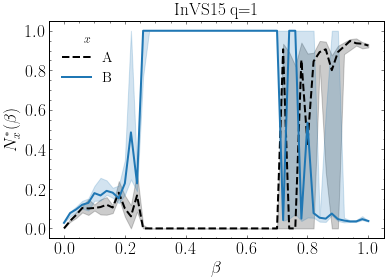

loaded data: 0.0
loaded data: 0.02
loaded data: 0.04
loaded data: 0.06
loaded data: 0.08
loaded data: 0.1


In [ ]:
prop_committed = 0.03
betas = np.linspace(0, 1, 51)
ensemble_size = 10
run_length = 10**6
q = [1,0]
social_structures = ['InVS15', 'LyonSchool', 'SFHH', 'Thiers13']
for social_structure in social_structures[:1]:
    for q in qs:
    ###    Needs to be changed to take 100 sampe avg from the last 50000 points, similiar to the paper!
        Astar_list = []
        Astar25_list = []
        Astar75_list = []
        Bstar_list = []
        Bstar25_list = []
        Bstar75_list = []
        for beta in betas:
            fname = f'{social_structure}_{prop_committed}_{beta}_{beta}_q={q}_{run_length}_{ensemble_size}'

            data = genfromtxt(f'outputs/{fname}.csv', delimiter=',')

            print(f'loaded data: {beta}')

            A_data = data[0::3,:]
            B_data = data[1::3,:]
            AB_data = data[2::3,:]

            N = A_data[0,0]+B_data[0,0]+AB_data[0,0]

            A_data = A_data/N
            B_data = B_data/N
            AB_data = AB_data/N

            Astar_list.append(np.median(A_data[:, -1]))
            Astar25_list.append(np.percentile(A_data[:, -1], 25))
            Astar75_list.append(np.percentile(A_data[:, -1], 75))

            Bstar_list.append(np.median(B_data[:, -1]))
            Bstar25_list.append(np.percentile(B_data[:, -1], 25))
            Bstar75_list.append(np.percentile(B_data[:, -1], 75))

        plt.figure()
        plt.plot(betas, Astar_list, color='k', linestyle='--', label='A')
        plt.fill_between(betas, Astar25_list, Astar75_list, color='k', alpha=0.2)

        plt.plot(betas, Bstar_list, color='tab:blue', label='B')
        plt.fill_between(betas, Bstar25_list, Bstar75_list, color='tab:blue', alpha=0.2)

        plt.legend(title=r'$x$')
        plt.title(f'{social_structure} q={q}')
        plt.xlabel(r'$\beta$')
        plt.ylabel(r'$N^{\ast}_{x}(\beta)$')
        plt.savefig(f'figures/fig3b_{social_structure}_{prop_committed}_q={q}_{run_length}_{ensemble_size}.pdf')
        plt.show()


